In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 多项式回归

如果你的数据实际上比简单的直线更复杂呢？ __[多项式回归和模型泛化](https://www.jianshu.com/p/8e5da35d6382 )__  <<< 这里有个绘图链接

令人惊讶的是，你依然可以使用 __线性模型__ 来拟合 __非线性数据__ 。	

一个简单的方法是 __对每个特征进行加权后作为新的特征__ ，然后 __训练一个线性模型__ 在这个扩展的特征集。

这种方法称为 __多项式回归__。

In [259]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
noise = np.random.normal(0, 1, size=100)
noise = noise.reshape(-1, 1)
y = 0.5 * X**2 + X + 2 + noise

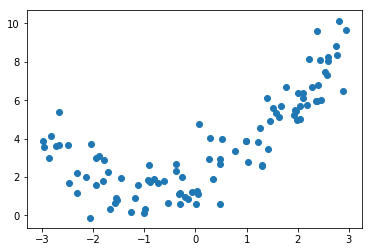

In [260]:
plt.scatter(x,y)

In [261]:
from sklearn.linear_model import LinearRegression

In [264]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
lin_reg.intercept_ # 输出截距

array([3.53698747])

In [266]:
lin_reg.coef_      # 输出θ 

array([[1.02374843]])

#### 直接使用直线拟合数据

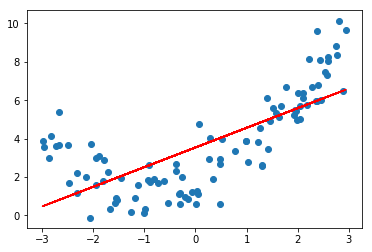

In [268]:
plt.scatter(X,y)
plt.plot(X,lin_reg.predict(X),"r-") 

很清楚的看出， __直线不能恰当的拟合这些数据__ 。

于是，我们使用	__Scikit-Learning__ 的 __PolynomialFeatures__ 类进行训练数据集的转换，让训练集中 __每个特征的平方__ （2 次多项式） 作为 __新特征__（在这种情况下，仅存在一个特征）


### PolynomialFeatures

__PolynomialFeatures__ 这个类有 3 个参数：

* degree：控制多项式的次数；

* interaction_only：默认为 False，如果指定为 True，那么就不会有特征自己和自己结合的项，组合的特征中没有 a2 和 b2；

* include_bias：默认为 True 。如果为 True 的话，那么结果中就会有 0 次幂项，即全为 1 这一列。

__参数详解：__

* interaction_only 的意思是，得到的组合特征只有相乘的项，没有平方项。

* interaction_only 设置成 True 的意思是： 例如 [a,b] 的多项式交互式输出 [1,a,b,ab]。

* include_bias 设置 0 次幂那一列是否要。

In [245]:
from sklearn.preprocessing import PolynomialFeatures

__使用sklearn中的PolynomialFeatures进行多项式回归__

In [279]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(X)

__X_poly__ 现在 __包含原始特征__ 和 __这个特征的平方__ 。

In [284]:
print('X[0]: ',X[0])
print('x_poly[0]: ',x_poly[0])

X[0]:  [0.7637525]
x_poly[0]:  [0.7637525  0.58331788]


现在你可以在这个扩展训练集上使用 __LinearRegression__ 模型进行拟合。

In [271]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

__根据线性回归得到预测值__

In [276]:
y_predect = lin_reg2.predict(x_poly)

#### 使用多项式拟合数据
    
__排序__ 是为了在绘制线的时候从最左端开始绘制

__y_predect[np.argsort(x)]__ 依据 __np.sort(x)__ 的顺序

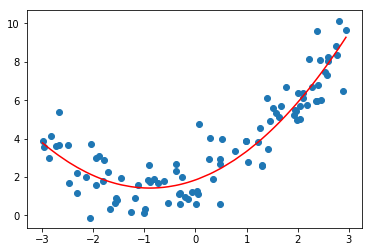

In [278]:
plt.scatter(x,y)
plt.plot(np.sort(x), y_predect[np.argsort(x)], color='r')

__多项式的截距__

In [272]:
lin_reg2.intercept_

array([1.8482332])

__多项式的斜率__

In [273]:
lin_reg2.coef_

array([[0.95244305, 0.53351694]])

__这样模型的预测函数就是等于:__   

y = 0.53 \* x^2 + 0.95 \* x + 1.84

### 温馨提示： 

<img src='1.jpg'>

### 问题：如何确定模型复杂度？如何判断模型过拟合还是欠拟合？

在这个训练集上，二次模型有着较好的泛化能力。那是因为在生成数据时使用了二次模型，但是一般我们不知道这个数据生成函数是什么。

__那我们该如何决定我们模型的复杂度呢__ ？ __你如何告诉我你的模型是过拟合还是欠拟合__ ？


### 解决方案：

__1、使用交叉验证：__ 我们可以通过 __交叉验证__ 来评估一个模型的 __泛化能力__ ，如果一个模型在训练集上表现的 __良好__ ，通过 __交叉验证指标__ 却得出其泛化能力很 __差__ ，那么模型 __过拟合__ 。如果两个方面都表现的不好，那么 __欠拟合__ 。这种方法可以告诉我们模型是太 __复杂__ 还是太 __简单__ 了。

__2、通过观察学习曲线：__ 画出模型在训练集上的表现，同时画出以训练集规模为自变量的训练集函数。为了得到图像，需要在训练集的不同规模子集上进行多次训练

### 绘制模型的学习曲线

In [294]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

新建一个训练数据和测试数据

In [299]:
m	=	100 
X2	=	6	*	np.random.rand(m,	1)	-	3 
y2	=	0.5	*	X**2	+	X	+	2	+	np.random.randn(m,	1)

In [337]:
def plot_learning_curves(model,x,y):
    x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),'r-',linewidth=2,label = 'train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label = 'val')    
    plt.ylabel('RMSE')
    plt.xlabel('Training set size')    
    plt.legend(loc='upper right')

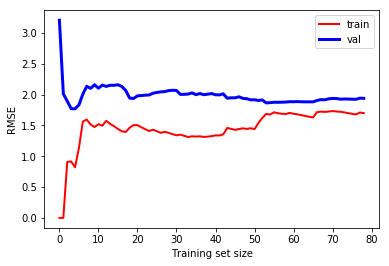

In [338]:
line_reg3 = LinearRegression()
plot_learning_curves(line_reg3,X,y)

#### 这幅图值得我们深究。

首先，我们观察 __训练集__ 的表现：当训练集只有一两个样本的时候，模型能够非常好的拟合它们，这也是为什么曲线是 __从零开始__ 的原因。

但是当 __加入了一些新的样本的时候__ ，训练集上的拟合程度变得难以接受，出现这种情况有 __两个原因__: 

* __1、__ 是因为数据中含有噪声

* __2、__ 是数据根本不是线性的。


* __因此随着数据规模的增大，误差也会一直增大， 直到达到高原地带并趋于稳定__ 

在之后，继续加入新的样本，模型的平均误差不会变得更好或者更差。

我们继续来看模型在 __验证集__ 上的表现，当以非常少的样本去训练时，模型不能恰当的泛化，也就是为什么验证误差一开始是非常大的。当训练样本变多的到时候，模型学习的东西变多，验证误差开始缓慢的下降。 __但是一条直线不可能很好的拟合这些数据__ ，因此最后误差会到达在一个高原地带并 __趋于稳定__ ，最后和训练集的曲线 __非常接近__ 。

上面的曲线表现了一个 __典型的欠拟合模型__ ： __两条曲线都到达高原地带并趋于稳定，并且最后两条曲线非常接近，同时误差值非常大。__

#### 提示

如果你的模型在训练集上是 __欠拟合__ 的，添加更多的样本是没用的。你需要使用一个 __更复杂的模型__ 或者找到 __更好的特征__ 。


####  在一个相同数据上10阶多项式中拟合学习曲线

In [341]:
from sklearn.pipeline import Pipeline

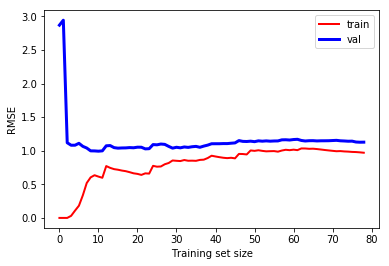

In [377]:
polynomial_regression = Pipeline((
    ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
    ('linear_regression',LinearRegression())
))
plot_learning_curves(polynomial_regression,X,y)

__图中的模型过拟合：__

训练数据的学习曲线和测试数据的学习曲线存在 __间隔__ ，这表明训练集上的表现要比测试集的表现好很多，这是 __过拟合__ 的典型表现。如果你使用了 __更大的训练数据__ ，这两条曲线最后会 __非常相近__ 。

#### 提示

__改善模型过拟合__ 的一种方法是提供更多的训练数据，直到 __训练误差__ 和 __验证误差__ 相等。

#### 偏差和方差的权衡

在统计和机器学习领域有个重要的理论： __一个模型的泛化误差由三个不同误差的和决定：__

* __偏差：__ 泛化误差的这部分误差是由于错误的假设决定的。例如实际是一个二次模型，你却假设了一个线性模型。一个高偏差的模型最容易出现欠拟合。 


* __方差：__ 这部分误差是由于模型对训练数据的微小变化较为敏感，一个多自由度的模型更容易有高的方差(例如一个高阶多项式模型)，因此会导致模型过拟合。 


* __不可约误差：__ 这部分误差是由于数据本身的噪声决定的。降低这部分误差的唯一方法就是进行数据清洗（例如：修复数据源，修复坏的传感器，识别和剔除异常值）。


### 线性回归的正则化

降低模型的过拟合的好方法是 __正则化__ 这个模型(即限制它)：模型有越少的自由度，就越难拟合数据。例如，正则化一个多项式模型，一个简单的方法就是 __减少多项式的阶数__。

对于一个 __线性模型__ ，正则化的典型实现就是 __约束模型中的参数权重__。

__三种不同约束权重的方法：__

* __Ridge 回归__

* __Lasso 回归__

* __Elastic Net__

# 岭(Ridge)回归

岭回归是线性回归的 __正则化版__ ：在 __损失函数__ 上直接加上一个 __正则化项__

### 详解：
<img src='2.jpg'>

### 提示：

一般情况下， __训练过程使用的损失函数和测试过程使用的评价函数是不一样的__ 。除了 __正则化__ ，还有一个 __不同__ ：__训练时的损失函数应该在优化过程中易于求导__ ，而在 __测试过程中__ ， __评价函数__ 更应该接近最后的客观表现。

一个好的例子：__在分类训练中我们使用对数损失（马上我们会讨论它）作为损失函数，但是我们却使用精确率/召回率来作为它的评价函数。__

### 超参数：

__超参数α__ 决定了你想正则化这个模型的强度。如果 __α = 0__ 那此时的 __岭回归__ 便变为了 __线性回归__ 。如果 __α__ 非常的大，所有的 __权重__ 最后都接近于 __零__ ，最后结果 __将是一条穿过数据平均值的水平直线__ 。

### 公式 4-8 是岭回归的损失函数：

<img src='3-2.jpg'>


### 注意：

在使用 __岭回归__ 前，对 __数据进行放缩__ （可以使用 StandardScaler	）是非常重要的，算法对于输入特征的数值尺度（scale）非常敏感。 __大多数的正则化模型都是这样的。__

### 不同α下的模型表现：

<img src='4.jpg'>

<img src='5.jpg'>

#### 使用	Scikit-Learn 来进行 封闭方程 的求解

使用	Cholesky	法进行矩阵分解对 __封闭方程公式__ 进行变形

In [381]:
from sklearn.linear_model import Ridge

In [383]:
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.0684046]])

#### 使用随机梯度法进行求解

__penalty__	参数指的是 __正则项__ 的 __惩罚类型__ 。指定 __“l2”__ 表明你要在损失函数上添加一项：权重向量 __"l2" 范数平方的一半__ ，这就是简单的 __岭回归__ 。


In [384]:
from sklearn.linear_model import SGDRegressor

In [386]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

D:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.04602686])

# Lasso 回归

Lasso 回归 和 Ridge 回归相似，也是正则化版的线性回归，像岭回归一样也是在损失函数上加上一个正则项，但是正则项不是 __"l2" 范数平方的一半__ ，而是 __"l1"范数__。

### Lasso 回归的损失函数：

<img src='6.jpg'>


<img src='7.jpg'>

### __可以看出α的值越大，不重要的特征消除的越强烈。__

####  Scikit-Learn	的	Lasso	类的小例子

In [387]:
from sklearn.linear_model import Lasso

In [388]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.03140023])

# 弹性网络(ElasticNet)

弹性网络是介于 Ridge回归 和 Lasso回归 之间的一种方案。它的正则项是“Ridge回归”和“Lasso回归”正则项的简单混合，你可以通过控制它的参数“混合率r”来控制正则化项。

* 当r=0时，弹性网络就是 __Ridge回归__


* 当r=1时，弹性网络就是 __Lasso回归__

### 弹性网络损失函数：

<img src='8.jpg'>

#### Scikit-Learn	ElasticNet的案例

__l1_ratio__ 指的就是混合率	__r__

In [389]:
from sklearn.linear_model import ElasticNet

In [390]:
elasric_net = ElasticNet(l1_ratio=0.5)
elasric_net.fit(X,y)
elasric_net.predict([[1.5]])

array([4.71271286])

### 如何合理的选择 “线性回归”、“Ridge回归”、“Lasso回归”、“ElasticNet”呢？

一般来说 __有一点正则项的模型表现会更好__ ，因此我们通常会避免使用简单的线性回归。

通常 __“Ridge回归”__ 是一个很好的首选项。

但是如果你的 __特征仅有少数是有用__ 的话，那么你应该选择 __“Lasso回归”__ 或者 __“ElasticNet”__ ,因为他们两个可以将 __无用的特征的权重降为0__。

一般来说 __“ElasticNet”__ 的表现要比 __“Lasso回归”__ 的表现要 __好__ 一些，因为在 __特征数量比样本的数量大的时候__ ，或者 __特征之间有很强的相关性的时候__ ， __Lasso__ 可能会表现的 __不规律__ 。


### 早期停止法：

<img src='9.jpg'>


In [392]:
from sklearn import datasets
from sklearn.base import clone

D:\python\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [393]:
iris = datasets.load_iris()

In [397]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [401]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [404]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [403]:
iris.data[1]

array([4.9, 3. , 1.4, 0.2])

In [414]:
x_iris_train,x_iris_test,y_iris_train,y_iris_test = train_test_split(iris.data,iris.target,test_size=0.2)

#### SGDRegressor

* 参数：

    * penalty：指明惩罚项，比如 l2 正则化

    * warm_start: warm_start=True 时，调用	fit() 方法后，训练会从停下来的地方继续，而不是从头重新开始。

    * learning_rate：指明学习率的状态 constant 表示学习率固定不变为 eta0 指定的大小。

    * eta0: 学习率大小

In [407]:
sgd_reg2 = SGDRegressor(penalty=None,warm_start=True,learning_rate='constant',eta0=0.005)

#### 早期停止法

In [415]:
minimum_val_error = float('inf') # python中的正无穷或负无穷，使用float("inf")或float("-inf")来表示。
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg2.fit(x_iris_train,y_iris_train)
    y_val_predict = sgd_reg2.predict(x_iris_test)
    val_error = mean_squared_error(y_val_predict,y_iris_test)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg2)

## 逻辑回归

Logistic	回归 （也称为	Logit	回归）通常 __用于估计一个实例属于某个特定类别的概率__ （例如，这电子邮件是 垃圾邮件的概率是多少？）


### 概率估计

那么它是怎样工作的？	就像线性回归模型一样，Logistic	回归模型 __计算输入特征的加权和（加上偏差项）__ ，但它不像线性回归模型那样直接输出结果，而是把结果输入 __logistic()函数__ 进行 __二次加工__ 后进行输出。

这个 __logistic函数__ 其实是一个 __sigmoid函数__ ，其分布函数是一个s型曲线。

### 损失函数(对数损失)

这个损失函数对于求解 __最小化损失函数的 θ__  是没有公式解的（没有等价的正规方程）。 

但好消息是，这个损失函数是 __凸__ 的，所以梯度下降（或任何其他优化算法）一定能够找到 __全局最小值__ （如果学习速率不是太大，并且你等待足够长的时间）

### 决策边界

让我们尝试建立一个分类器，仅仅使用 __花瓣的宽度__ 特征来识别	__Virginica__

In [419]:
from sklearn.linear_model import LogisticRegression

In [441]:
x_iris_vir = iris.data[:,3:] 
y_iris_vir = (iris.target == 2).astype(np.int)

In [437]:
x_iris_vir.shape

(150, 1)

In [442]:
logstic_reg = LogisticRegression()
logstic_reg.fit(x_iris_vir,y_iris_vir)

D:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

我们来看看模型估计的花瓣宽度从	0	到	3	厘米的概率估计

In [449]:
X_new = np.linspace(0,3,1000).reshape(-1,1)

y_proba = logstic_reg.predict_proba(X_new)
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

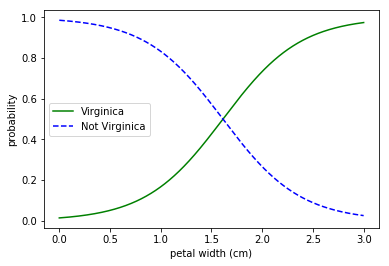

In [453]:
plt.plot(X_new,y_proba[:,1],'g-',label='Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Virginica')
plt.xlabel('petal width (cm)')
plt.ylabel('probability')
plt.legend(loc='center left')

中间的交点的垂线，就是我们的决策边界了，predict_proba返回的概率为50%。

当 petal width > 1.62 的时候，就认为它是  Virginica ，因为此时的概率大于等于50%，认为他是正类。

In [468]:
logstic_reg.predict([[1.7],[1.62],[1.5]])

array([1, 1, 0])

## softmax回归

Logistic 回归模型可以直接推广到支持 __多类别分类__ ，不必组合和训练多个二分类器，其称为 __Softmax 回归__ 或 __多类别 Logistic 回归__ 。 

### 损失函数(交叉熵)

softmax的损失函数是 __交叉熵__。

__交叉熵__ 通常用于 __衡量待测类别__ 与 __目标类别__ 的 __匹配程度__

当进行 __二分类预测__ 时， __交叉熵损失函数__ 等同于 __Logistic 回归的损失函数（对数损失）__ 。
